In [4]:
import numpy as np
import pandas as pd
import statistics
import math
import seaborn as sns
import matplotlib.pyplot as plt
import ast

sns.set(style='darkgrid', palette='viridis', context='talk')


In [13]:
simData = np.load(r"../../out/geneRxnVerifData/output.npy", allow_pickle=True, encoding='ASCII')
# simData = np.load(r"../../out/geneRxnVerifData/output_glc.npy", allow_pickle=True, encoding='ASCII')
stoichiometry = np.load(r"../../out/geneRxnVerifData/stoichiometry.npy", allow_pickle=True, encoding='ASCII')

In [14]:
simData.tolist()['agents']['0']['listeners']['fba_results'].keys()

dict_keys(['reactionFluxes', 'estimated_fluxes', 'estimated_dmdt', 'target_dmdt', 'estimated_exchange_dmdt'])

In [15]:
fba = simData.tolist()['agents']['0']['listeners']['fba_results']

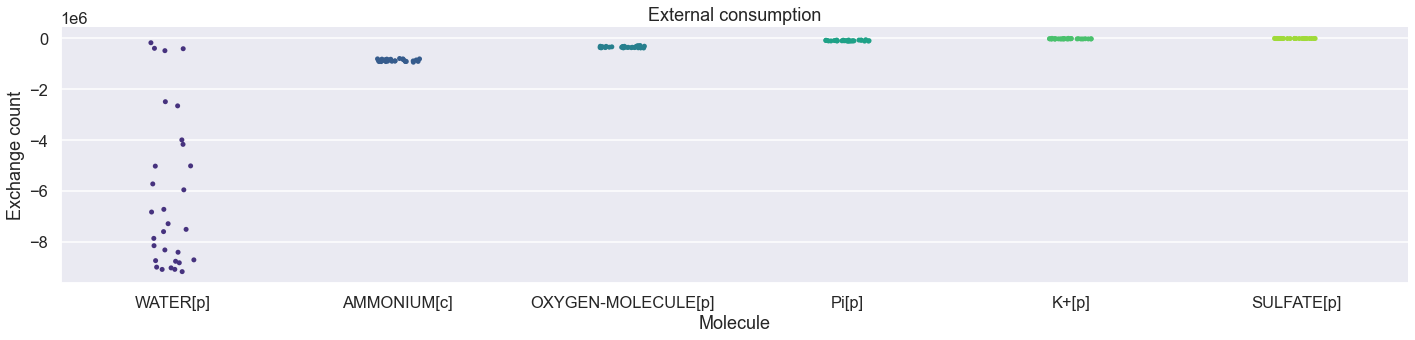

In [16]:
sorted_exchange = pd.DataFrame(fba['estimated_exchange_dmdt']).sort_values(by=10, axis=1)
sns.catplot(y="Exchange count", x="Molecule", data=sorted_exchange.iloc[:,0:6].melt(var_name="Molecule", value_name="Exchange count"), aspect=4).set(title='External consumption')

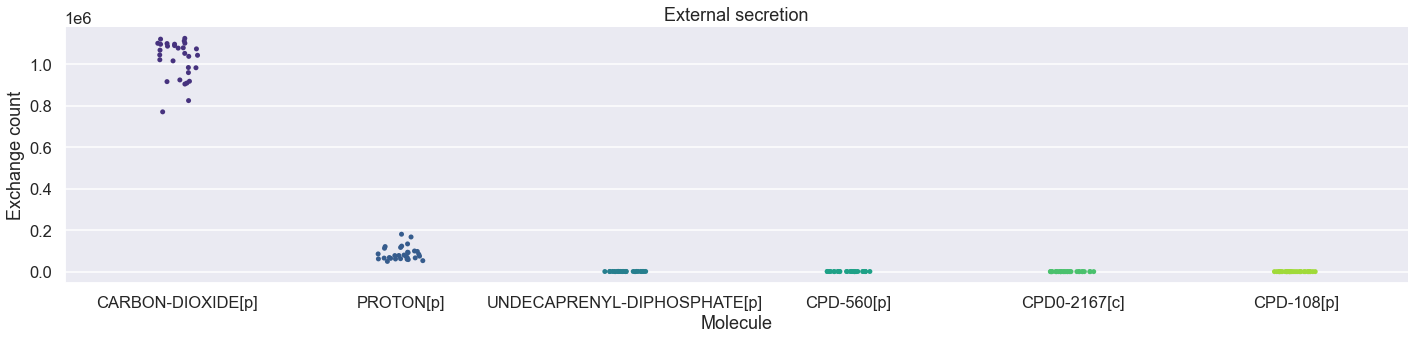

In [17]:
sorted_exchange = pd.DataFrame(fba['estimated_exchange_dmdt']).sort_values(by=10, axis=1, ascending=False)
sns.catplot(y="Exchange count", x="Molecule", data=sorted_exchange.iloc[:,0:6].melt(var_name="Molecule", value_name="Exchange count"), aspect=4).set(title='External secretion')

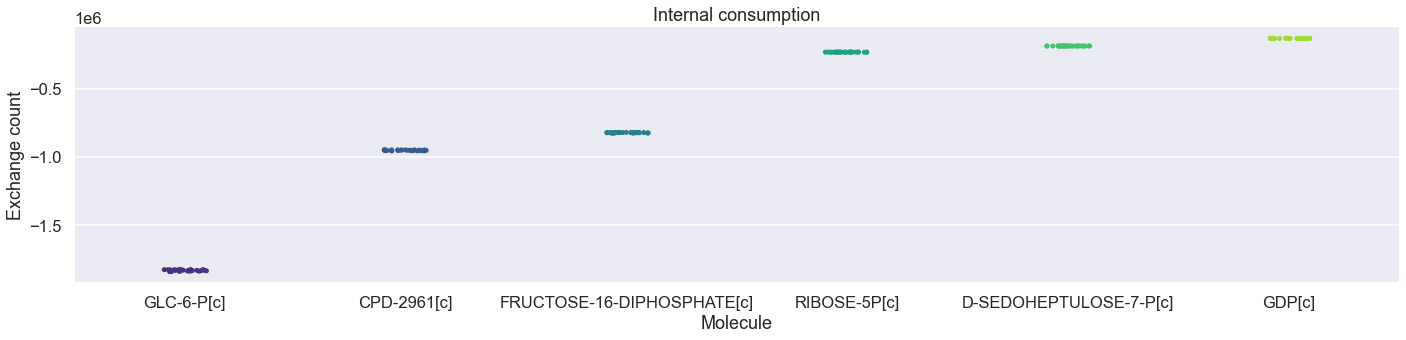

In [18]:
sorted_exchange = pd.DataFrame(fba['target_dmdt']).sort_values(by=10, axis=1)
sns.catplot(y="Exchange count", x="Molecule", data=sorted_exchange.iloc[:,0:6].melt(var_name="Molecule", value_name="Exchange count"), aspect=4).set(title='Internal consumption')

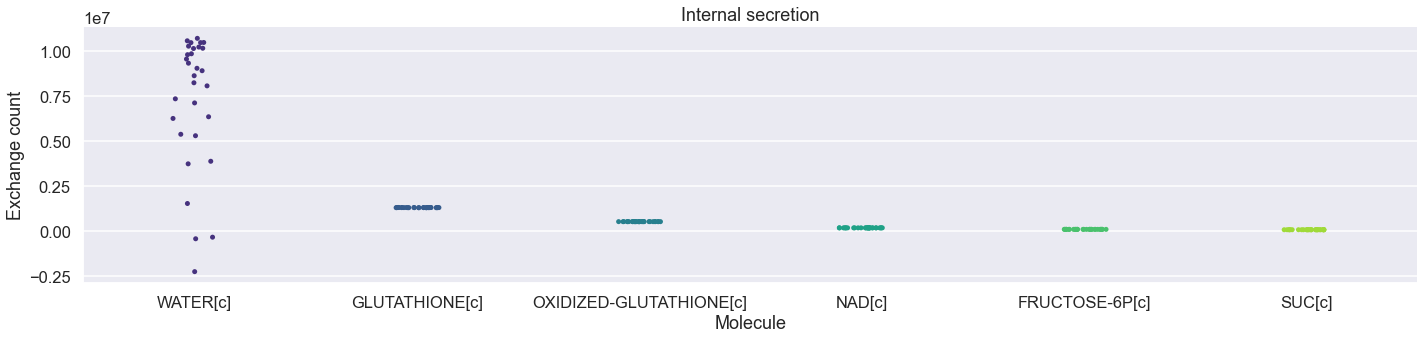

In [19]:
sorted_exchange = pd.DataFrame(fba['target_dmdt']).sort_values(by=10, axis=1, ascending=False)
sns.catplot(y="Exchange count", x="Molecule", data=sorted_exchange.iloc[:,0:6].melt(var_name="Molecule", value_name="Exchange count"), aspect=4).set(title='Internal secretion')

In [20]:
for rxn, stoich in stoichiometry.tolist().items():
    for mol in stoich:
        if 'GLC-6-P[c]'==mol and fba['estimated_fluxes'][rxn][10]>10000:
            print(rxn, stoich, fba['estimated_fluxes'][rxn])

GLU6PDEHYDROG-RXN-GLC-6-P/NADP//D-6-P-GLUCONO-DELTA-LACTONE/NADPH/PROTON.55. {'GLC-6-P[c]': -1, 'NADP[c]': -1, 'D-6-P-GLUCONO-DELTA-LACTONE[c]': 1, 'NADPH[c]': 1, 'PROTON[c]': 1} [679896, 676778, 743193, 730350, 733248, 726462, 761663, 733956, 755643, 788423, 826067, 830680, 801809, 837569, 813273, 830208, 860165, 869814, 848358, 872019, 864220, 838328, 851259, 879851, 873301, 865382, 843158, 880991, 881700, 903428]
PGLUCISOM-RXN-GLC-6-P//FRUCTOSE-6P.21. (reverse) {'GLC-6-P[c]': 1, 'FRUCTOSE-6P[c]': -1} [682946, 679828, 747211, 734443, 737719, 730891, 767549, 739926, 762520, 795406, 833859, 838709, 810552, 846505, 822602, 839819, 869938, 879877, 858649, 882555, 874815, 849218, 862137, 890831, 884337, 876606, 854380, 892322, 892933, 914906]
